<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Preparing-our-dataset" data-toc-modified-id="1.-Preparing-our-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Preparing our dataset</a></span></li><li><span><a href="#2.-EDA" data-toc-modified-id="2.-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. EDA</a></span></li><li><span><a href="#2.-Encoding" data-toc-modified-id="2.-Encoding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2. Encoding</a></span></li><li><span><a href="#3.-Splitting-our-data" data-toc-modified-id="3.-Splitting-our-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>3. Splitting our data</a></span></li><li><span><a href="#6.-Train-a-decision-tree-to-classify-genre" data-toc-modified-id="6.-Train-a-decision-tree-to-classify-genre-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>6. Train a decision tree to classify genre</a></span></li><li><span><a href="#7.-Compare-our-decision-tree-to-a-KNN-classifier" data-toc-modified-id="7.-Compare-our-decision-tree-to-a-KNN-classifier-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>7. Compare our decision tree to a KNN classifier</a></span></li><li><span><a href="#10.-Views" data-toc-modified-id="10.-Views-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>10. Views</a></span></li></ul></div>

**Obiettivo:** Senza ascoltare alcuna canzone, classificare il tipo di musica di ogni traccia, a partire dal csv e dal file json contenente le metriche della canzone.

### 1. Preparing our dataset

In [1]:
import pandas as pd
import numpy as np
import json as js

In [2]:
data  = pd.read_csv('dataset.csv')
data.info()

data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy


In [3]:
data_clean = data.drop(['comments', 'composer', 'date_created', 'date_recorded', 'favorites',
       'genres', 'genres_all', 'information', 'interest',
       'license', 'lyricist', 'tags',
       'publisher', 'title','language_code','listens','number'],axis=1)
data_clean

,track_id,bit_rate,duration,genre_top
0,135,256000,837,Rock
1,136,256000,509,Rock
2,151,192000,192,Rock
3,152,192000,193,Rock
4,153,256000,405,Rock
...,...,...,...,...
17729,155063,320000,283,Hip-Hop
17730,155064,320000,250,Hip-Hop
17731,155065,320000,219,Hip-Hop
17732,155066,320000,252,Hip-Hop


In [4]:
#importo anche il file json
file_json = open("metrics.json")
file_json
data_js = pd.read_json("metrics.json")
data_js

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


### 2. EDA

In [6]:
#faccio il merge dei due dataset per averne uno unico che sarà la mia base di partenza
data_merge=pd.merge(left=data_clean, right=data_js, on='track_id')
data_merge

,track_id,bit_rate,duration,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,256000,405,Rock,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018
1,154,256000,319,Rock,0.970135,0.352946,0.023852,9.571129e-01,0.113261,0.032177,53.758,0.035632
2,155,192000,756,Rock,0.981657,0.142249,0.912122,9.672940e-01,0.363510,0.087527,91.912,0.034325
3,169,192000,144,Rock,0.989141,0.225978,0.722835,2.630763e-01,0.092371,0.053406,94.322,0.028347
4,170,192000,181,Rock,0.886660,0.298518,0.744333,9.209505e-01,0.139587,0.088781,97.880,0.073548
...,...,...,...,...,...,...,...,...,...,...,...,...
4797,124718,224206,202,Hip-Hop,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414
4798,124719,217951,201,Hip-Hop,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720
4799,124720,199442,181,Hip-Hop,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240
4800,124721,235940,140,Hip-Hop,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087


In [7]:
#controllo quanti sono le classi da classificare
data_merge.genre_top.value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

### 2. Encoding

In [8]:
#encoding
label='genre_top'

from sklearn.preprocessing import StandardScaler, OneHotEncoder

# labels
y = data_merge[label].values

y = OneHotEncoder(sparse=False, drop='if_binary').fit_transform(y.reshape(-1, 1)).squeeze()

# oppure con pandas
# y = pd.get_dummies(y, drop_first=True).values.squeeze()

y.shape
y

array([1., 1., 1., ..., 0., 0., 0.])

In [9]:
#categorical = ['language_code']
numerical = ['bit_rate','duration','acousticness','danceability','energy','instrumentalness','liveness','speechiness']

In [10]:
#X_cat = data_merge[categorical]
X = data_merge[numerical]

In [12]:
#X = np.concatenate([X_cat,X_num], axis =1)
X

,bit_rate,duration,acousticness,danceability,energy,instrumentalness,liveness,speechiness
0,256000,405,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740
1,256000,319,0.970135,0.352946,0.023852,9.571129e-01,0.113261,0.032177
2,192000,756,0.981657,0.142249,0.912122,9.672940e-01,0.363510,0.087527
3,192000,144,0.989141,0.225978,0.722835,2.630763e-01,0.092371,0.053406
4,192000,181,0.886660,0.298518,0.744333,9.209505e-01,0.139587,0.088781
...,...,...,...,...,...,...,...,...
4797,224206,202,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315
4798,217951,201,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130
4799,199442,181,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174
4800,235940,140,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553


### 3. Splitting our data

In [13]:
#importo le librerie per creare i miei dati da dividere in train e test per allenare i modelli (scelgo un 80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=22)

In [14]:
#controllo che le dimensioni siano omogenee
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3841, 8), (961, 8), (3841,), (961,))

### 6. Train a decision tree to classify genre

In [15]:
#importo le librerie per il decision tree classifier e per il controllo dell'accuratezza
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from numpy import random


In [16]:
#utilizzo un albero decisionale come modello di classificazione (dopo diversi tentativi l'utilizzo del criterio Gini ha portato
# a un'accuratezza migliore. Abbiamo scelto la profondità massima dell'albero a 5 per le prestazioni migliori)
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [17]:
#alleno l'albero decisionale
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [18]:
#testo il modello dopo il train con il sample di test
p_test_dt = model_dt.predict(X_test)

In [19]:
#confronto il risultato al termine del train con i miei dati di test
errori_DT = accuracy_score(y_test, p_test_dt) 
print(errori_DT)

0.9063475546305931


### 7. Compare our decision tree to a KNN classifier

In [20]:
#importo la libreria per il classificatore KNN
from sklearn.neighbors import KNeighborsClassifier

In [21]:
#la scelta di metrica minkowski è dettata da migliori prestazioni rispetto a quella euclidea
model_knn = KNeighborsClassifier(metric='minkowski', n_neighbors=3) 
#alleno il knn classifier
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
#testo il modello dopo il train
p_test_knn = model_knn.predict(X_test)

In [23]:
#calcolo l'accuratezza
errori_knn = accuracy_score(y_test, p_test_knn)
print(errori_knn)

0.7950052029136316


### 10. Views

In [24]:
#visualizzo un report di classificazione che da informazioni in più oltre all'accuratezza
from sklearn.metrics import classification_report, confusion_matrix
#knn
#print(confusion_matrix(y_test, p_test_knn))
print("Report KNN")
print(classification_report(y_test, p_test_knn))

#decision tree

print("Report Decision Tree")
#print(confusion_matrix(y_test, p_test_dt))
print(classification_report(y_test, p_test_dt))

Report KNN
              precision    recall  f1-score   support

         0.0       0.47      0.32      0.38       189
         1.0       0.85      0.91      0.88       772

    accuracy                           0.80       961
   macro avg       0.66      0.62      0.63       961
weighted avg       0.77      0.80      0.78       961

Report Decision Tree
              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75       189
         1.0       0.93      0.95      0.94       772

    accuracy                           0.91       961
   macro avg       0.86      0.83      0.85       961
weighted avg       0.90      0.91      0.90       961



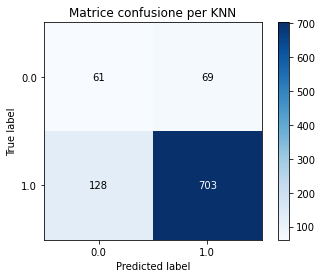

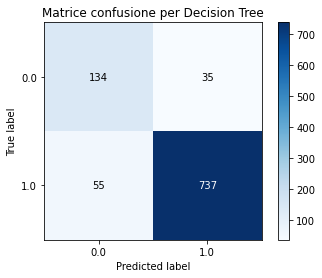

In [25]:
#grafico le matrici di confusione per i due modelli per verificare quale dei due sia il migliore
import scikitplot as skplt 
import matplotlib.pyplot as plt
#print('Matrice confusione per KNN')

skplt.metrics.plot_confusion_matrix(p_test_knn,y_test, title='Matrice confusione per KNN')
plt.show()

#print('Matrice confusione per Decision Tree')
skplt.metrics.plot_confusion_matrix(p_test_dt,y_test, title='Matrice confusione per Decision Tree')
plt.show()

#la classe 1 (Rock) sembra viene predetta molto meglio della classe 0(Hip-Hop) forse data dalla disomogeneità dei samples 
#all'interno del dataset

In [56]:
#prova algoritmo di decision tree

#X_int=X.astype(int)
pippo=np.array(X.iloc[[3893],:])

pippo.reshape(-1, 1)

p_prova_dt = model_dt.predict(pippo)
#p_prova_knn = model_knn.predict(pippo)
print(p_prova_dt)
#print(p_prova_knn)

#y[4801]

data_merge.iloc[[3893],:]



[0.]


,track_id,bit_rate,duration,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
3893,3,256000,237,Hip-Hop,0.374408,0.528643,0.817461,0.001851,0.10588,0.461818,126.957,0.26924
